# PRNN - Assignment 1
## Group - 13

### Due Date : 03/032024

## Members:

#### Rishav Saha ( Sr no - 22573)
#### Ashish Kumar (Sr no - 22674)
#### Atul Tomar (Sr no - 22408)

# Binary Classification Analysis

Q4 : Binary Classification : The data from 10 sensors planted at an industrial cite is tabulated.
And depending on these sensor value we take a decision on the kind of product(one of 2 products).
The task is to predict the product being produced by looking at the observation from these 10
sensors. Implement on all the relevant methods given below and for each of the method use all
the relevant evaluation metrics. Data is present in /Data/binary-classification/. Last column is
the label and remaining columns are the features.

In [332]:
import matplotlib.pyplot as plt
import numpy as np

In [333]:
FILE_PATH="/data/home1/rishavs/PRNN_Assignment/Binary_Classification/binary_class_classification_data_group_13_train.txt"

In [334]:
np_data=np.loadtxt(FILE_PATH,skiprows=1)

np_labels=np_data[:,-1]
np_data=np_data[:,:-1]
# np_data[0].shape
np_data=np.transpose(np_data)

## Metric Calculator

In [335]:
from matplotlib import pyplot as plt
class Metric:
    def __init__(self,predictions,actual_label):
        self.predictions=predictions
        self.actual_label=actual_label
    def accuracy(self):
        data_len=len(self.predictions)
        correct=0
        for i in range(data_len):
            if self.predictions[i]==self.actual_label[i]:
                correct+=1
        acc=correct/data_len
        print(f"Accuracy of {round(acc*100,3)}%")
    def confusion_matrix(self):
        self.true_negative=0
        self.true_positive=0
        self.false_negative=0
        self.false_positive=0
        for i in range(len(self.predictions)):
            if self.actual_label[i]==0:
                if self.predictions[i]==0:
                    self.true_negative+=1
                else:
                    self.false_positive+=1
            else:
                if self.predictions[i]==0:
                    self.false_negative+=1
                else:
                    self.true_positive+=1
        final_confusion_matrix=np.array([[self.true_negative, self.false_positive],
                                      [self.false_negative, self.true_positive]])
        # print(self.true_positive)
        print("Confusion Matrix: ")
        print(final_confusion_matrix)
        plt.figure(figsize=(2,2))
        plt.imshow(final_confusion_matrix,cmap="grey")
    def multi_class_confusion_matrix(self):
        unique_classes=np.unique(self.actual_label)
        confusion_matrix=np.zeros((len(unique_classes),len(unique_classes)),dtype=np.int64)
        for i in range(len(self.predictions)):
            row_index = np.where(unique_classes == self.predictions[i])[0][0]
            col_index = np.where(unique_classes == self.actual_label[i])[0][0]
            confusion_matrix[row_index, col_index] += 1
        plt.imshow(confusion_matrix)
        print(confusion_matrix)
        return confusion_matrix
    def f1_score(self):
        precision = self.true_positive / (self.true_positive + self.false_positive)
        recall = self.true_positive / (self.true_positive + self.false_negative)
        f1 = 2 * ((precision * recall) / (precision + recall))
        print(f"F1 Score: {f1:.2f}")
    def multi_class_f1_Score(self,confusion_matrix):
        num_classes = confusion_matrix.shape[0]
        precision = np.zeros(num_classes)
        recall = np.zeros(num_classes)
        f1_score = np.zeros(num_classes)
        
        for i in range(num_classes):
            true_positive = confusion_matrix[i, i]
            false_positive = np.sum(confusion_matrix[:, i]) - true_positive
            false_negative = np.sum(confusion_matrix[i, :]) - true_positive
            
            precision[i] = true_positive / (true_positive + false_positive)
            recall[i] = true_positive / (true_positive + false_negative)
            
            f1_score[i] = 2 * (precision[i] * recall[i]) / (precision[i] + recall[i])
    
        return f1_score

    def roc_curve(self, predicted_scores):
        tpr_values = []
        fpr_values = []
    
        thresholds = sorted(set(predicted_scores), reverse=True)
    
        total_positives = sum(self.actual_label)
        total_negatives = len(self.actual_label) - total_positives
    
        tp = 0
        fp = 0
    
        for threshold in thresholds:
            predictions = [1 if score >= threshold else 0 for score in predicted_scores]
    
            tp = sum(1 for p, actual in zip(predictions, self.actual_label) if p == 1 and actual == 1)
            fp = sum(1 for p, actual in zip(predictions, self.actual_label) if p == 1 and actual == 0)
            tpr = tp / total_positives
            fpr = fp / total_negatives
    
            tpr_values.append(tpr)
            fpr_values.append(fpr)
    
        plt.plot(fpr_values, tpr_values, marker='o', linestyle='-')
        plt.xlabel('False Positive Rate')
        plt.ylabel('True Positive Rate')
        plt.title('ROC Curve')
        plt.grid(True)
        plt.show
        
    def multi_class_roc(self,probabilities):
        tpr_values = []
        fpr_values = []
        
        thresholds = sorted(set(probabilities), reverse=True)
        
        total_positives = sum(self.actual_labels)
        total_negatives = len(self.actual_labels) - total_positives
        
        for threshold in thresholds:
            predictions = [1 if score >= threshold else 0 for score in probabilities]
        
            tp = sum(1 for p, actual in zip(predictions, self.actual_labels) if p == 1 and actual == 1)
            fp = sum(1 for p, actual in zip(predictions, self.actual_labels) if p == 1 and actual == 0)
            tpr = tp / total_positives
            fpr = fp / total_negatives
        
            tpr_values.append(tpr)
            fpr_values.append(fpr)
        
        plt.plot(fpr_values, tpr_values, marker='o', linestyle='-')
        plt.xlabel('False Positive Rate')
        plt.ylabel('True Positive Rate')
        plt.title('ROC Curve')
        plt.grid(True)
        plt.show()

## Data Splitter

In [336]:
def train_test_split(data,labels,train_ratio):
    data_length=data.shape[1]
    print(data_length)
    split_point=int(data_length*(train_ratio))
    X_train=data[:,:split_point]
    X_test=data[:,split_point:]
    # print(labels.shape)
    y_train=labels[:split_point]
    y_test=labels[split_point:]
    return X_train,y_train,X_test,y_test

In [337]:
X_train,y_train,X_test,y_test=train_test_split(np_data,np_labels,train_ratio=0.7)
print(X_train.shape)
print(y_train.shape)
X_train=X_train.T
X_test=X_test.T

14000
(10, 9800)
(9800,)


## Linear Classifier

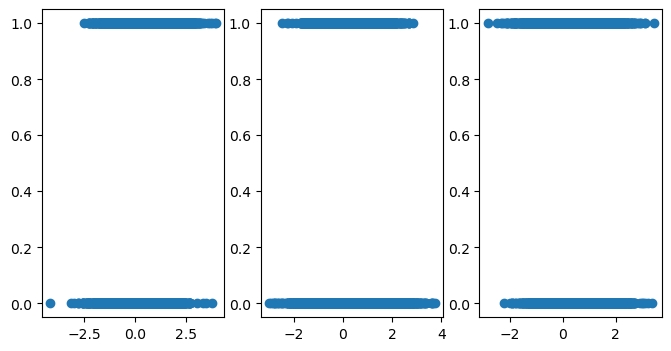

In [338]:
# Checking some features, if they are linearly separable or not
plt.figure(figsize=(8,4))

plt.subplot(1,3,1)
plt.scatter(np_data[4],np_labels)

plt.subplot(1,3,2)
plt.scatter(np_data[0],np_labels)

plt.subplot(1,3,3)
plt.scatter(np_data[5],np_labels)

plt.show()

In [339]:
LEARNING_RATE=0.001
EPOCHS=10
class LinearModels:
    def __init__(self,data,labels):
        self.data=data
        self.labels=labels
        num_of_features=self.data.shape[1]
        self.weights=np.zeros(num_of_features)
        # print(self.weights.shape)
    def sigmoid(self,x):
        sigmoid_value=1 / (1 + np.exp(-x))
        return sigmoid_value
    def train(self,actual_y):
        count=0
        while(count!=EPOCHS):
            W_TX=np.dot(self.data,self.weights)
            predicted_label=self.sigmoid(W_TX)

            # now we will calculate the gradient of the predicted_Data w.r.t weight
            # weight_gradient=np.dot(self.data.T, predicted_label * (1 - predicted_label))
            weight_gradient = np.dot(self.data.T, (predicted_label - actual_y) * predicted_label * (1 - predicted_label))
            #optimising using gradient descent
            self.weights=self.weights-(LEARNING_RATE*weight_gradient)
            # print(f"For iteration : {count}")
            # print(self.weights)
            count+=1
    def predict(self,test_data):
        self.test_data=test_data
        # print(self.test_data.shape)
        # print(self.weights.shape)
        W_TX=np.dot(self.test_data,self.weights)
        predictions=self.sigmoid(W_TX)
        # print(predictions)
        return predictions

In [340]:
linear_model=LinearModels(X_train,y_train)
linear_model.train(y_train)
linear_model_predictions=linear_model.predict(X_test)

In [341]:
linear_model_predicted_classes=[]
for prob in linear_model_predictions:
    if prob<0.5:
        linear_model_predicted_classes.append(0)
    else:
        linear_model_predicted_classes.append(1)

### Linear Model Metrics

In [342]:
# Accuracy
linear_model_metric=Metric(linear_model_predicted_classes,y_test)
linear_model_metric.accuracy()

Accuracy of 68.714%


Confusion Matrix: 
[[1559  542]
 [ 772 1327]]


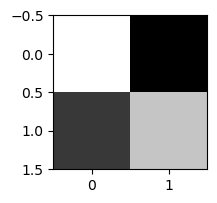

In [343]:
linear_model_metric.confusion_matrix()

In [344]:
linear_model_metric.f1_score()

F1 Score: 0.67


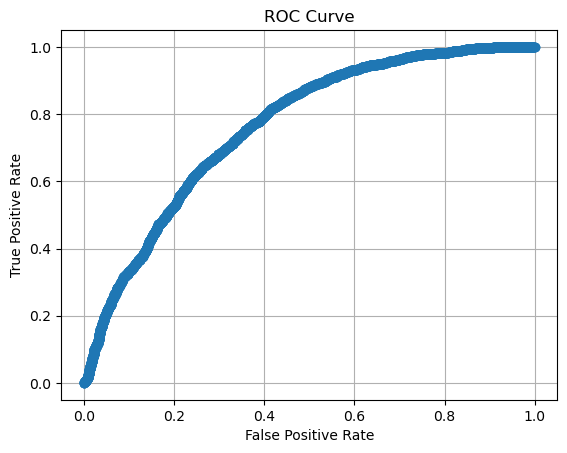

In [345]:
linear_model_metric.roc_curve(linear_model_predictions)

## Bayes Classifier with Normal CLass Conditional Density

In [346]:
class BayesClassifier:
    def __init__(self,data,labels):
        self.classes=np.unique(labels)
        self.data=data
        # storing the data indexes with class = 0 and class =1 
        self.class_0_data = data[labels == 0]
        self.class_1_data = data[labels == 1]

        #calculating and storing the priors
        self.class_priors = {}
        self.class_priors[0] = len(self.class_0_data) / data.shape[0]
        self.class_priors[1] = len(self.class_1_data) / data.shape[0]
        print(np.unique(labels))
    
    def train(self, data, labels):
        self.data = data
        self.data_mean = {}
        self.covariance = {}
        

        # calculating and storing the mean andd variance for both classes
        self.data_mean[0] = np.mean(self.class_0_data, axis=0)
        self.data_mean[1] = np.mean(self.class_1_data, axis=0)
        self.covariance[0] = np.diag(np.var(self.class_0_data, axis=0))
        self.covariance[1] = np.diag(np.var(self.class_1_data, axis=0))   
        # print(self.covariance[0])
    
    def predict(self, test_data):
        predictions = []
         # we can split the log likelihood into 3 parts: the constant term , the covariance term and the inner exponential term
        constant_term = -(test_data.shape[1] * 0.5) * np.log(2 * np.pi)
        for x_i in test_data:
            class_posteriors = []
            
            
            for label in self.classes:
                exponential_term = -0.5 * np.dot(np.dot((x_i - self.data_mean[label]).T, np.linalg.inv(self.covariance[label])), (x_i - self.data_mean[label]))
                covariance_term = -0.5 * np.log(np.linalg.det(self.covariance[label]))
                log_likelihood = constant_term + covariance_term + exponential_term
                posterior = np.log(self.class_priors[label]) + log_likelihood
                class_posteriors.append(posterior)
            
            predictions.append(np.argmax(class_posteriors))
        
        return predictions

In [347]:
bayes_model=BayesClassifier(X_train,y_train)
bayes_model.train(X_train,y_train)
bayes_model_predictions=bayes_model.predict(X_test)

[0. 1.]


### Bayes Model Metric

In [348]:
bayes_model_metric=Metric(bayes_model_predictions,y_test)
bayes_model_metric.accuracy()

Accuracy of 80.881%


Confusion Matrix: 
[[1637  464]
 [ 339 1760]]


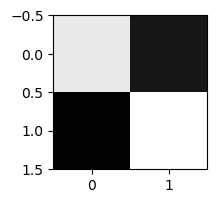

In [349]:
bayes_model_metric.confusion_matrix()

In [350]:
bayes_model_metric.f1_score()

F1 Score: 0.81


## K-Nearest Neighbours Classifier

In [359]:
class KNN:
    def __init__(self, k, distance_metric='euclidean'):
        self.k = k
        self.distance_metric = distance_metric

    def euclidean_distance(self, data_point1, data_point_2):
        distance=np.sqrt(np.sum((data_point1 - data_point_2) ** 2))
        return distance
        
    def cosine_distance(self, data_point_1, data_point_2):
        data_point_1_norm = np.linalg.norm(data_point_1)
        data_point_2_norm = np.linalg.norm(data_point_2)
        distance = 1 - (np.dot(data_point_1, data_point_2) / (data_point_1_norm * data_point_2_norm))
        return distance
        
    def calculate_distance(self, data_point_1, data_point_2):
        if self.distance_metric == 'euclidean':
            return self.euclidean_distance(data_point_1, data_point_2)
        elif self.distance_metric == 'cosine':
            return self.cosine_distance(data_point_1, data_point_2)

    def train(self, data, labels):
        self.X_train = data
        self.y_train = labels
        
    def predict(self, X):
        predictions = []
        for x in X:
            distances = [self.calculate_distance(x, x_train) for x_train in self.X_train]
            sorted_indices = np.argsort(distances)[:self.k]
            k_nearest_labels = self.y_train[sorted_indices]
            # print(type(k_nearest_labels[0]))
            k_nearest_labels=k_nearest_labels.astype(np.int64)
            predicted_class = np.argmax(np.bincount(k_nearest_labels))
            predictions.append(predicted_class)
        return np.array(predictions)

In [360]:
values_for_k=[5,10]
distance_metrics=["euclidean","cosine"]
# for k=5  and euclidean distance
knn_model_1=KNN(values_for_k[0],distance_metric=distance_metrics[0])
knn_model_1.train(X_train,y_train)
knn_prediction_1=knn_model.predict(X_test)

In [361]:
#for k=10 and euclidean distance
knn_model_2=KNN(values_for_k[1],distance_metric=distance_metrics[0])
knn_model_2.train(X_train,y_train)
knn_prediction_2=knn_model_2.predict(X_test)

In [362]:
# for k=5 and cosine distance
knn_model_3=KNN(values_for_k[0],distance_metric=distance_metrics[1])
knn_model_3.train(X_train,y_train)
knn_prediction_3=knn_model_3.predict(X_test)

In [363]:
# for k=10 and cosine distance
knn_model_4=KNN(values_for_k[1],distance_metric=distance_metrics[1])
knn_model_4.train(X_train,y_train)
knn_prediction_4=knn_model_4.predict(X_test)

### KNN Classifier Metrics

Accuracy of 80.19%
Confusion Matrix: 
[[1647  454]
 [ 378 1721]]
F1 Score: 0.81


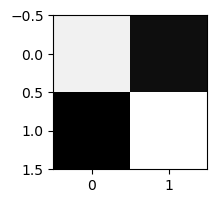

In [371]:
# Calculating the metrics for all the different knn models
knn_metric_1=Metric(knn_prediction_1,y_test)
knn_metric_1.accuracy()
knn_metric_1.confusion_matrix()
knn_metric_1.f1_score()

Accuracy of 81.5%
Confusion Matrix: 
[[1741  360]
 [ 417 1682]]
F1 Score: 0.81


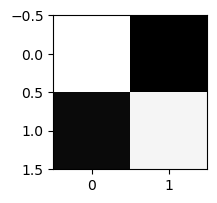

In [372]:
knn_metric_2=Metric(knn_prediction_2,y_test)
knn_metric_2.accuracy()
knn_metric_2.confusion_matrix()
knn_metric_2.f1_score()

Accuracy of 80.238%
Confusion Matrix: 
[[1733  368]
 [ 462 1637]]
F1 Score: 0.80


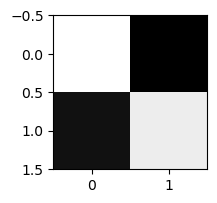

In [373]:
knn_metric_3=Metric(knn_prediction_3,y_test)
knn_metric_3.accuracy()
knn_metric_3.confusion_matrix()
knn_metric_3.f1_score()

Accuracy of 80.024%
Confusion Matrix: 
[[1788  313]
 [ 526 1573]]
F1 Score: 0.79


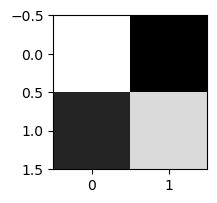

In [375]:
knn_metric_4=Metric(knn_prediction_4,y_test)
knn_metric_4.accuracy()
knn_metric_4.confusion_matrix()
knn_metric_4.f1_score()

## Parzen Window Classifier

In [377]:
class ParzenWindowClassifier:
    def __init__(self, h, kernel='gaussian', volume=None):
        self.h = h
        self.kernel = kernel
        self.volume = volume 

    def gaussian_kernel(self, x):
        return np.exp(-(x ** 2) / 2) / np.sqrt(2 * np.pi)

    def epanechnikov_kernel(self, x):
        return 0.75 * (1 - x ** 2) if np.abs(x) <= 1 else 0

    def estimate_density(self, data, x):
        kernel_func = self.gaussian_kernel if self.kernel == 'gaussian' else self.epanechnikov_kernel
        distances = np.abs(x - data) / self.h

        if self.volume is not None:
            # Keep only the points within the fixed volume V
            distances = distances[distances <= self.volume]

        return np.sum(kernel_func(distances)) / (len(data) * self.h)

    def train(self, X, y):
        self.classes = np.unique(y)
        self.class_densities = {}

        for c in self.classes:
            class_data = X[y == c]
            self.class_densities[c] = class_data

    def predict(self, X):
        predictions = []
        for x in X:
            posterior_probs = []

            for c in self.classes:
                density_estimate = np.mean([self.estimate_density(class_data, x) for class_data in self.class_densities[c]])
                posterior_probs.append(density_estimate)

            predicted_class = np.argmax(posterior_probs)
            predictions.append(predicted_class)

        return np.array(predictions)

In [177]:
parzen_window_classifier=ParzenWindowClassifier(h=0.5)
parzen_window_classifier.train(X_train,y_train)
parzen_window_predictions=parzen_window_classifier.predict(X_test[:5000,:])

### Parzen Window Metric

In [181]:
parzen_window_metric=Metric(parzen_window_predictions,y_test)
parzen_window_metric.accuracy()

Accuracy of 79.619%


Confusion Matrix: 
[[1532  569]
 [ 287 1812]]


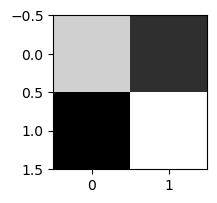

In [182]:
parzen_window_metric.confusion_matrix()

In [184]:
parzen_window_metric.f1_score()

F1 Score: 0.81


## Gaussian Mixture Models for Binary Classification

In [401]:
class GMM:
    def __init__(self, num_features, num_components=2, max_iters=100, tolerance=1e-4):
        self.num_features = num_features
        self.num_components = num_components
        self.max_iters = max_iters
        self.tolerance = tolerance

        # Initialize model parameters
        self.pi = np.ones(num_components) / num_components
        self.mu = np.random.rand(num_components, num_features)
        self.covariance = np.array([np.eye(num_features) for _ in range(num_components)])

    def gaussian_density_value(self, x, mean, cov):
        exponent = -0.5 * np.sum(np.dot(x - mean, np.linalg.inv(cov)) * (x - mean), axis=1)
        return (1.0 / (np.sqrt((2 * np.pi) ** self.num_features * np.linalg.det(cov))) *
                np.exp(exponent))

    def E_step(self, X):

        responsibilities = np.zeros((len(X), self.num_components))

        for k in range(self.num_components):
            responsibilities[:, k] = self.pi[k] * self.gaussian_density_value(X, self.mu[k], self.covariance[k])

        responsibilities /= responsibilities.sum(axis=1, keepdims=True)

        return responsibilities

    def M_step(self, data, responsibilities):
        # We will update the parameters
        Nk = responsibilities.sum(axis=0)

        self.pi = Nk / len(data)

        self.mu = np.dot(responsibilities.T, data) / Nk[:, np.newaxis]

        for k in range(self.num_components):
            diff = data - self.mu[k]
            self.covariance[k] = np.dot(responsibilities[:, k] * diff.T, diff) / Nk[k]

    def train(self, X):

        for iteration in range(self.max_iters):
            # E-step
            responsibilities = self.E_step(X)

            # M-step
            self.M_step(X, responsibilities)

            # Check for convergence
            if iteration > 0:
                diff = np.linalg.norm(self.mu - prev_mu)
                if diff < self.tolerance:
                    break

            prev_mu = np.copy(self.mu)

    def predict(self, X):

        responsibilities = self.E_step(X)
        return np.argmax(responsibilities, axis=1)




In [402]:
total_features = X_train.shape[1]
num_components = 2  # Change this to the desired number of components
mixture_model= GMM(total_features, num_components)
mixture_model.train(X_train)

mixture_model_prediction = mixture_model.predict(X_test)

### GMM Metrics

In [403]:
gmm_metric=Metric(mixture_model_prediction,y_test)
#Accuracy
gmm_metric.accuracy()

Accuracy of 72.905%


Confusion Matrix: 
[[1101 1000]
 [ 138 1961]]


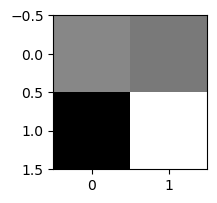

In [404]:
# Confusion MAtrix
gmm_metric.confusion_matrix()

In [405]:
# F1 Score
gmm_metric.f1_score()

F1 Score: 0.78


Q5 : Multi class Classification problem (10 Classes): In the same industry from where we got the
previous data has another big plant. There they have deployed 25 sensors and they produce 10
kinds of products. The task is to predict depending on the data from 25 sensors, predict which
of these 10 products are. Implement on all the relevant methods given below and for each of the
method use all the relevant evaluation metrics. Data is present in /Data/binary-classification/.
Last column is the label and remaining columns are the features.

In [ ]:
FILE_PATH_2="MultiClass_Classification/multi_class_classification_data_group_13_train.txt"

In [ ]:
data=np.loadtxt(FILE_PATH_2,skiprows=1)
#Separating the data and the label
labels=data[:,-1]
data=data[:,:-1]

In [193]:
def train_test_split_2(data,labels,train_ratio):
    data_length=data.shape[0]
    # print(data_length)
    split_point=int(data_length*(train_ratio))
    X_train=data[:split_point]
    X_test=data[split_point:]
    # print(labels.shape)
    y_train=labels[:split_point]
    y_test=labels[split_point:]
    return X_train,y_train,X_test,y_test

In [194]:
X_train_2,y_train_2,X_test_2,y_test_2=train_test_split_2(data,labels,0.7)

## Multi Bayes Classifier with Normal Class Conditional Density

In [195]:
class MutliClassBayesClassifier:
    def __init__(self,data,labels):
        self.classes=np.unique(labels)
        self.data=data
        self.labels=labels
        total_datapoints=data.shape[0]
        # separating and storing the data index with different labels 
        self.class_data_indices=[]
        for i in range(len(self.classes)):
            self.class_data_indices.append(data[labels==i])
        # print(class_data_indices)
        # Calculating and sotring the class prior values
        self.class_priors={}
        for j in range(len(self.classes)):
            prior=len(self.class_data_indices[i])/total_datapoints
            self.class_priors[j]=prior

    def train(self):
        self.mean = {}
        self.covariances = {}
        
        # Calculating and storing the mean and covariance for each class
        for i in range(len(self.classes)):
            label = self.classes[i]
            self.mean[label] = np.mean(self.class_data_indices[i], axis=0)
            self.covariances[label] = np.cov(self.class_data_indices[i], rowvar=False)

    
    def predict(self, test_data):
        predictions = []
        
        for x_i in test_data:
            class_posteriors = []
            
            for label in self.classes:
                mean = self.mean[label]
                covariance = self.covariances[label]
                
                # Calculating the log likelihood for each class
                constant_term = -0.5 * np.log(np.linalg.det(covariance))
                exponential_term = -0.5 * np.dot(np.dot((x_i - mean).T, np.linalg.inv(covariance)), (x_i - mean))
                log_likelihood = constant_term + exponential_term
                
                # Computing posterior probability using Bayes' rule
                posterior = np.log(self.class_priors[label]) + log_likelihood
                class_posteriors.append(posterior)
            
            # Selecting the class with maximum posterior probability
            predictions.append(np.argmax(class_posteriors))
        
        return predictions

In [196]:
multi_bayes_classifier=MutliClassBayesClassifier(X_train_2,y_train_2)
multi_bayes_classifier.train()
multi_class_bayes_predictions=multi_bayes_classifier.predict(X_test_2)

In [216]:
def multi_class_confusion_matrix(predicted_Data,actual):
    unique_classes=np.unique(y_test_2)
    confusion_matrix=np.zeros((len(unique_classes),len(unique_classes)),dtype=np.int64)
    for i in range(len(predicted_Data)):
        row_index = np.where(unique_classes == predicted_Data[i])[0][0]
        col_index = np.where(unique_classes == actual[i])[0][0]
        confusion_matrix[row_index, col_index] += 1
    plt.imshow(confusion_matrix)
    print(confusion_matrix)

### Multi Class Bayesian Metrics

In [247]:
multi_class_bayesian_metric=Metric(multi_class_bayes_predictions,y_test_2)
# Accuracy
multi_class_bayesian_metric.accuracy()

Accuracy of 45.714%


[[1006  118  102  131  144  111  127  112  143  120]
 [ 156 1148  125  138  153  166  134  125  119   99]
 [ 110  106  969  149  125  125  101  152  145  110]
 [ 116  111  113  872  116  100  118  145  117  106]
 [ 134  100   97  124  915  126  113   86  192  130]
 [ 105  120  113  126  130  882  142   83  124  142]
 [ 157  110  137  143  131  194 1024  149   96  113]
 [ 123  101  147  149  113   94  119  968  129  132]
 [ 162   87  149  102  169  145   92  121  867  142]
 [ 103   95  106  136  135  183  132  124  205  949]]


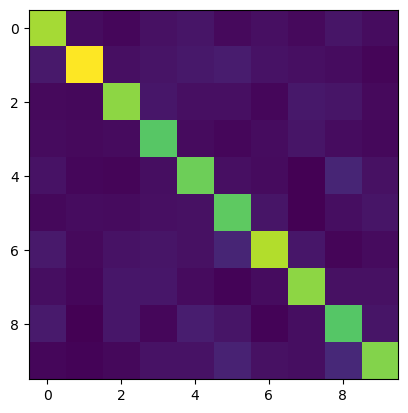

In [248]:
# Confusion Matrix
confusion_matrix=multi_class_bayesian_metric.multi_class_confusion_matrix()

In [246]:
# F1 score
multi_class_bayesian_metric.multi_class_f1_Score(confusion_matrix)

array([0.46943537, 0.51491366, 0.46698795, 0.437751  , 0.44117647,
       0.43097972, 0.47015611, 0.46763285, 0.4155284 , 0.45072429])

## Linear Classifier ( one vs Rest)

In [281]:
import numpy as np

LEARNING_RATE = 0.001
EPOCHS = 10

class MultiClassLinearModel:
    def __init__(self, data, labels):
        self.data = data
        self.labels = labels
        self.num_classes = np.unique(labels).shape[0]
        self.classifiers = []

    def sigmoid(self, x):
        return 1 / (1 + np.exp(-x))

    def train(self):
        for c in range(self.num_classes):
            binary_labels = np.where(self.labels == c, 1, 0)
            
            num_of_features = self.data.shape[1]
            weights = np.zeros(num_of_features)

            for _ in range(EPOCHS):
                W_TX = np.dot(self.data, weights)
                predicted_label = self.sigmoid(W_TX)

                weight_gradient = np.dot(self.data.T, (predicted_label - binary_labels) * predicted_label * (1 - predicted_label))
                
                weights -= LEARNING_RATE * weight_gradient
            
            self.classifiers.append(weights)
    def predict(self, X_test):
        predictions = np.zeros((X_test.shape[0], len(self.classifiers)))
        for idx, classifier in enumerate(self.classifiers):
            W_TX = np.dot(X_test, classifier)
            predicted_label = self.sigmoid(W_TX)
            predictions[:, idx] = predicted_label
            # print(predicted_label)
        return np.argmax(predictions, axis=1),predictions


In [282]:
multi_class_linear_model=MultiClassLinearModel(X_train_2,y_train_2)
multi_class_linear_model.train()
multi_class_linear_predictions,multi_class_linear_probabilities=multi_class_linear_model.predict(X_test_2)

### Multi Class Linear Model Metrics

In [290]:
multi_class_linear_metric=Metric(multi_class_linear_predictions,y_test_2)

#Accuracy
multi_class_linear_metric.accuracy()

Accuracy of 23.729%


[[  85   18    5    2   20    9   18   15   18   13]
 [ 477  715  222  227  369  218  215  277  241  189]
 [  46   53  279   40   45   52   23  114   53   83]
 [ 648  624  734 1300  615  656  370  768  743  699]
 [  94   40   30   29  262   56   27   33   83   49]
 [ 104  122  119   84  144  419  127  124  228  207]
 [ 543  449  468  303  476  540 1224  490  307  373]
 [   2    1    1    3    4    3    1   16    2    1]
 [  95   42   93   44  115   92   37  127  362  108]
 [  78   32  107   38   81   81   60  101  100  321]]


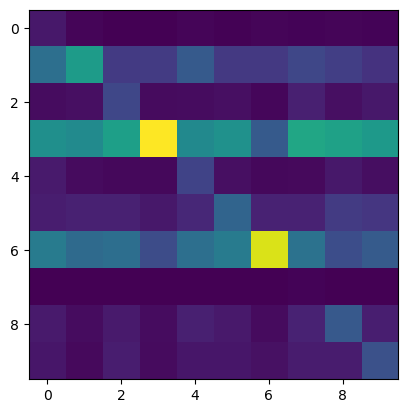

In [291]:
multi_linear_confusion_matrix=multi_class_linear_metric.multi_class_confusion_matrix()

In [292]:
multi_class_linear_metric.multi_class_f1_Score(multi_linear_confusion_matrix)

array([0.07157895, 0.27258864, 0.19606465, 0.28178173, 0.18489767,
       0.22029443, 0.33649485, 0.01524535, 0.22263223, 0.21104536])

## Multi Class Parzen Window

In [433]:
class Multi_Class_ParzenWindowClassifier:
    def __init__(self, h, kernel='gaussian', volume=None):
        self.h = h
        self.kernel = kernel
        self.volume = volume  # Fixed volume volume

    def gaussian_kernel(self, x):
        return np.exp(-(x ** 2) / 2) / np.sqrt(2 * np.pi)

    def epanechnikov_kernel(self, x):
        return 0.75 * (1 - x ** 2) if np.abs(x) <= 1 else 0

    def density_estimator(self, data, x):
        kernel_func = self.gaussian_kernel if self.kernel == 'gaussian' else self.epanechnikov_kernel
        distances = np.abs(x - data) / self.h

        if self.volume is not None:
            distances = distances[distances <= self.volume]

        return np.sum(kernel_func(distances)) / (len(data) * self.h)

    def training(self, X, y):
        self.classes = np.unique(y)
        self.class_densities = {}

        for c in self.classes:
            class_data = X[y == c]
            self.class_densities[c] = class_data

    def predict(self, test_data):
        predictions = []
        for x in test_data:
            posterior_probs= []

            for c in self.classes:
                density_estimate = np.mean([self.density_estimator(class_data, x) for class_data in self.class_densities[c]])
                posterior_probs.append(density_estimate)

            posterior= [prob / sum(posterior_probs) for prob in posterior_probs]
            predicted_class = np.argmax(posterior_probs)
            predictions.append(predicted_class)

        return np.array(predictions)


In [ ]:
# for gaussian kernel
multi_class_parzen_window=Multi_Class_ParzenWindowClassifier(h=0.4)
multi_class_parzen_window.training(X_train_2,y_train_2)
multi_class_parzen_predictions=multi_class_parzen_window.predict(y_test_2)

In [ ]:
# for epanechnikov kernel
multi_class_parzen_window_2=Multi_Class_ParzenWindowClassifier(kernel="epanechnikov",h=0.5)
multi_class_parzen_window_2.training(X_train_2,y_train_2)
multi_class_parzen_predictions_2=multi_class_parzen_window.predict(y_test_2)

### Multi Class Parzen Metrics

In [ ]:
multi_class_parzen_metric_1=Metric(multi_class_parzen_prediction)
multi_class_parzen_metric_1.accuracy()
multi_class_parzen_metric_1.confusion_matrix()
multi_class_parzen_metric_1.f1_score()

In [ ]:
multi_class_parzen_metric_2=Metric(multi_class_parzen_prediction_2)
multi_class_parzen_metric_2.accuracy()
multi_class_parzen_metric_2.confusion_matrix()
multi_class_parzen_metric_2.f1_score()

## Multi Class KNN Classifier

In [305]:
class Multi_class_KNN:
    def __init__(self, k, distance_metric='euclidean'):
        self.k = k
        self.distance_metric = distance_metric

    def euclidean_distance(self, x1, x2):
        return np.sqrt(np.sum((x1 - x2) ** 2))

    def cosine_distance(self, x1, x2):
        dot_product = np.dot(x1, x2)
        norm_x1 = np.linalg.norm(x1)
        norm_x2 = np.linalg.norm(x2)
        return 1 - (dot_product / (norm_x1 * norm_x2))

    def calculate_distance(self, x1, x2):
        if self.distance_metric == 'euclidean':
            return self.euclidean_distance(x1, x2)
        elif self.distance_metric == 'cosine':
            return self.cosine_distance(x1, x2)

    def training(self, data, labels):
        self.X_train = data
        self.y_train = labels

    def predict(self, X):
        predictions = []
        for x in X:
            distances = [self.calculate_distance(x, x_train) for x_train in self.X_train]
            sorted_indices = np.argsort(distances)[:self.k]
            k_nearest_labels = self.y_train[sorted_indices]
            # print(type(k_nearest_labels[0]))
            k_nearest_labels=k_nearest_labels.astype(np.int64)
            predicted_class = np.argmax(np.bincount(k_nearest_labels))
            predictions.append(predicted_class)

        return np.array(predictions)

In [ ]:
k=[5,10]
distance_metric=['euclidean','cosine']
# For k=5 and euclidean distance
multi_class_knn1=Multi_class_KNN(k[0],distance_metric[0])
multi_class_knn1.training(X_train_2,y_train_2)
multi_class_knn_predictions_1=multi_class_knn1.predict(X_test_2)

In [ ]:
#For k=5 and cosine distance
multi_class_knn2=Multi_class_KNN(k[0],distance_metric[1])
multi_class_knn2.training(X_train_2,y_train_2)
multi_class_knn_predictions_2=multi_class_knn2.predict(X_test_2)

In [ ]:
# For k=10 and euclidean distance
multi_class_knn3=Multi_class_KNN(k[1],distance_metric[0])
multi_class_knn3.training(X_train_2,y_train_2)
multi_class_knn_predictions_3=multi_class_knn3.predict(X_test_2)

In [ ]:
# For k=10 and cosine distance
multi_class_knn4=Multi_class_KNN(k[1],distance_metric[1])
multi_class_knn4.training(X_train_2,y_train_2)
multi_class_knn_predictions_4=multi_class_knn4.predict(X_test_2)

### Multi Class Knn Metric

In [ ]:
# For k=5 and euclidean distance
multi_class_knn_metric_1=Metric(multi_class_knn_predictions_1)
multi_class_knn_metric_1.accuracy()
multi_class_knn_metric_1.confusion_matrix()
multi_class_knn_metric_1.f1_score()

In [ ]:
# For k=5 and cosine distance
multi_class_knn_metric_2=Metric(multi_class_knn_predictions_2)
multi_class_knn_metric_2.accuracy()
multi_class_knn_metric_2.confusion_matrix()
multi_class_knn_metric_2.f1_score()

In [ ]:
# For k=10 and euclidean distance
multi_class_knn_metric_3=Metric(multi_class_knn_predictions_3)
multi_class_knn_metric_3.accuracy()
multi_class_knn_metric_3.confusion_matrix()
multi_class_knn_metric_3.f1_score()

In [ ]:
# For k=10 and cosine distance
multi_class_knn_metric_4=Metric(multi_class_knn_predictions_4)
multi_class_knn_metric_4.accuracy()
multi_class_knn_metric_4.confusion_matrix()
multi_class_knn_metric_4.f1_score()

## GMM for multi class

In [409]:
class GMM:
    def __init__(self, n_components=5, max_iter=10):
        self.n_components = n_components
        self.max_iter = max_iter
        self.pi = [1.0 / (self.n_components) for _ in range(self.n_components)]  # Mixing proportions

    def gaussian_desnity_value(self, x, mean_vector, covariance_matrix):
        const_part = (2 * np.pi) ** (-len(x) / 2.0) * np.linalg.det(covariance_matrix) ** (-1 / 2)
        expo_part = np.exp(-np.dot(np.dot((x - mean_vector).T, np.linalg.inv(covariance_matrix)), (x - mean_vector)) / 2)
        return const_part * expo_part

    def train(self, X):

        self.mean_vector = np.random.rand(self.n_components, X.shape[1])  

        self.covariance_matrices = [np.eye(X.shape[1]) for _ in range(self.n_components)]  

        for iteration in range(self.max_iter):
            RespMatrix = np.zeros((len(X), self.n_components))
            for i in range(len(X)):
                log_probs = []
                for k in range(self.n_components):
                    log_probs.append(np.log(self.pi[k]) + self.gaussian_desnity_value(X[i], self.mean_vector[k], self.covariance_matrices[k]))
                RespMatrix[i, :] = np.exp(log_probs - np.max(log_probs))  

            N = np.sum(RespMatrix, axis=0)  # Component responsibilities

            self.mean_vector = np.dot(RespMatrix.T, X) / N[:, np.newaxis]  #

            self.covariance_matrices = [
                np.dot(RespMatrix[:, k] * (X - self.mean_vector[k]).T, X - self.mean_vector[k]) / N[k]
                for k in range(self.n_components)
            ]  

            self.pi = N / len(X)  

    def predict(self, X):
        probas = []
        for n in range(len(X)):
            probas.append([self.gaussian_desnity_value(X[n], self.mean_vector[k], self.covariance_matrices[k])
                           for k in range(self.n_components)])
        cluster = [np.argmax(proba) for proba in probas]
        return cluster



In [416]:
multi_class_gmm_classifier=GMM()
multi_class_gmm_classifier.fit(X_train_2)
multi_class_gmm_predictions=multi_class_gmm_classifier.predict(X_test_2)

## Multi Class GMM Metrics

In [424]:
multi_class_gmm_metric=Metric(multi_class_gmm_predictions,y_test_2)
#accuracy
multi_class_gmm_metric.accuracy()

Accuracy of 10.343%


[[2172 2096 2058 2070 2131 2126 2102 2065 2137 2043]
 [   0    0    0    0    0    0    0    0    0    0]
 [   0    0    0    0    0    0    0    0    0    0]
 [   0    0    0    0    0    0    0    0    0    0]
 [   0    0    0    0    0    0    0    0    0    0]
 [   0    0    0    0    0    0    0    0    0    0]
 [   0    0    0    0    0    0    0    0    0    0]
 [   0    0    0    0    0    0    0    0    0    0]
 [   0    0    0    0    0    0    0    0    0    0]
 [   0    0    0    0    0    0    0    0    0    0]]


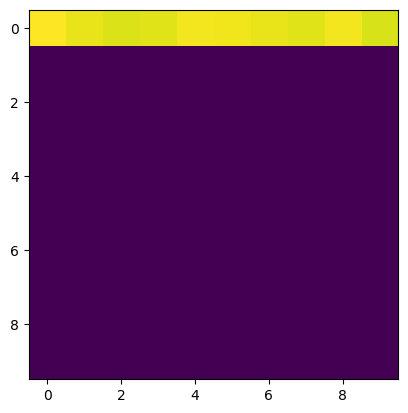

In [425]:
multi_class_gmm_confusion_matrix=multi_class_gmm_metric.multi_class_confusion_matrix()

In [426]:
multi_class_gmm_metric.multi_class_f1_Score(multi_class_gmm_confusion_matrix)

/tmp/ipykernel_2113035/375844923.py:64: RuntimeWarning: invalid value encountered in scalar divide
  recall[i] = true_positive / (true_positive + false_negative)


array([0.18746763,        nan,        nan,        nan,        nan,
              nan,        nan,        nan,        nan,        nan])

# Regression Analysis

In [311]:
import numpy as np
import matplotlib.pyplot as plt
from numpy import matrix
from numpy import linalg
from __future__ import division

In [312]:
def correlation_plot_q1(predicted_y,true_y):
    n = len(predicted_y[0])
    for j in range(n):
        y = true_y[:,j]
        t = predicted_y[:,j]
        mean_y = np.mean(y)
        mean_t=np.mean(t)
        sum = 0
        for i in range(len(y)):
            sum+= (y[i]-mean_y)*(t[i]-mean_t)
        covariance = sum/len(y)
        s_true = np.std(y)
        
        m = covariance/(s_true**2)
        b = np.mean(t)-m*np.mean(y)
        
        regression_line_y = np.multiply(m, y) + b
        
        # Plot the scatter points and regression line
        plt.plot(y, t,'bo',alpha=0.7)
        plt.plot(y, regression_line_y, color='red')

        # Add labels and title
        plt.xlabel(f'true y{j+1}')
        plt.ylabel(f'predicted y{j+1}')
        plt.title('correlation plot')

        # Show the plot
        plt.show()

In [313]:
def print_metrics_q12(pred_y,true_y):
    n = len(pred_y[0])
    for j in range(n):
        t=pred_y[:,j]
        y=true_y[:,j]
        print(f"{mse(y,t)} is the mean squared error for y{j+1}")
        print(f"{mae(y,t)} is the mean absolute error for y{j+1}")
        print(f"{pcc(y,t)} is the correlation coefficient between true y{j+1} and predicted y{j+1}")
    

In [314]:
#loading the data for 1st part
with open("regression_data_multilinear_group_13_train.txt", "r") as f:
    data = []
    for line in f: 
        d = line.strip().split()
        data.append(d)
#create training and testing data
#removing the first line feat1 feat2 ... 
data = data[1:]
data_size = len(data)
test_size = int(0.7 * data_size)
#randomly selecting indices for testing and training data
indices = np.random.permutation(data_size)

train_data = np.array([data[i] for i in indices[:test_size]],dtype=float)
#put test data here
test_data= np.array([data[i] for i in indices[test_size:]],dtype=float)
train_x1 = train_data[:,:10]
train_y1 = train_data[:,10:]
test_x1 = test_data[:,:10]
test_y1 = test_data[:,10:]

Q2 .We perform ERM with squared error loss.
We take x as input matrix of 10D vector and y as true 3D output.
Given in question "The features are readings from 10 sensors in the experiment environment. It is experimentally seen that the position of the particle depends linearly on these readings."

We assume the relation ship to be h(x)=wx with the bias term included
For each output dimension we take a hypothesis [h1 h2 h3]

In [315]:
#calculating weights for Q1
def weight_q1():
    size = len(train_x1)
    x0 = np.ones((size,1),dtype=float)
    y = train_y1
    x = np.concatenate((x0,train_x1),axis=1)
    temp = np.dot(matrix.transpose(x),x)
    t = linalg.inv(temp)
    w = np.dot(np.dot(t,matrix.transpose(x)),y)
    return w

In [316]:
def weight_q1_with_regularization():        
    size = len(train_x1)
    x0 = np.ones((size,1),dtype=float)
    y = train_y1
    x = np.concatenate((x0,train_x1),axis=1)
    temp = np.dot(matrix.transpose(x),x)

    i = np.identity(len(temp))

    t = linalg.inv(50*i+temp)
    w = np.dot(np.dot(t,matrix.transpose(x)),y)
    return w

In [317]:
#calculating mean squared error,  mse(true_y,predicted_y)
def mse(y,t):
    n = len(y)
    loss = 0
    
    for i in range(n):
        loss+= (y[i]-t[i])**2
    mean_loss= loss/n
    return mean_loss

#calculating mean absolute error, mae(true_y,predicted_y)
def mae(y,t):
    n = len(y)
    loss = 0
    for i in range(n):
        loss+= abs(y[i]-[t[i]])
    mean_loss= loss/n
    type(mean_loss)
    return mean_loss[0]

# Calculate pearson correlation coefficient pcc(true_y,predicted_y)
def pcc(y,t):
    
    covariance = np.cov(y, t)[0, 1]
    std_dev_y = np.std(y)
    std_dev_t = np.std(t)

    r = covariance/(std_dev_y*std_dev_t)
    return r


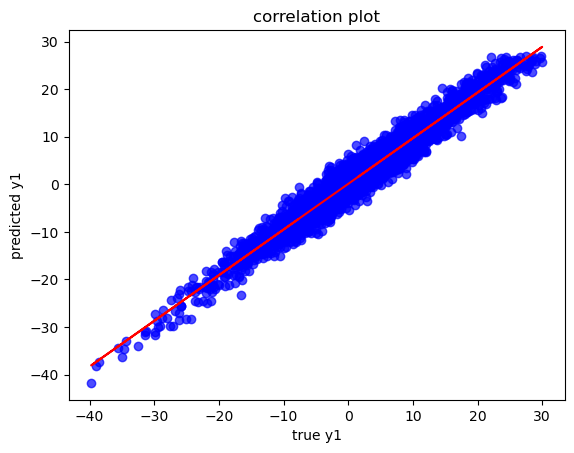

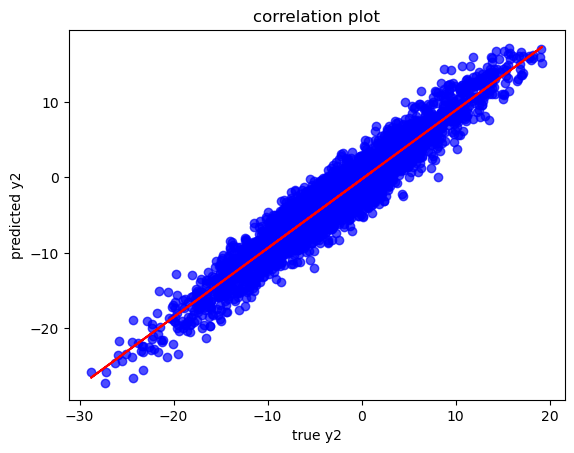

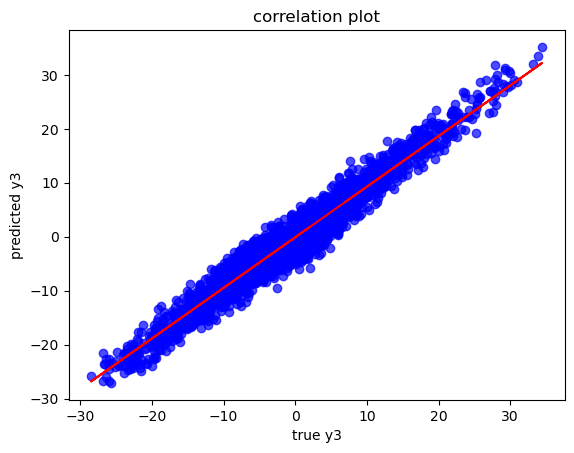

4.0979227296134075 is the mean squared error for y1
1.6104463793414168 is the mean absolute error for y1
0.9769616232607274 is the correlation coefficient between true y1 and predicted y1
3.971665700069287 is the mean squared error for y2
1.5989997112847905 is the mean absolute error for y2
0.9568744689497701 is the correlation coefficient between true y2 and predicted y2
4.183944952762581 is the mean squared error for y3
1.627328229619043 is the mean absolute error for y3
0.9690564961552685 is the correlation coefficient between true y3 and predicted y3


In [318]:

#testing    
w = weight_q1()
n = len(test_y1)
size = len(test_x1)
#adding x0 = 1 to x in order to incorporate the bias w0 in w
x0 = np.ones((size,1),dtype=float)
x = np.concatenate((x0,test_x1),axis=1)
pred_y = np.zeros((n,3),dtype=float)
for i in range(n):
    t = np.dot(np.transpose(w),x[i])
    pred_y[i] = t

correlation_plot_q1(pred_y,test_y1)
print_metrics_q12(pred_y,test_y1)


Q2. Now, it turns out that the position only depends on the magnitude of the force along 2 basis vectors (features 1 and 2). That is, the recordings in Q1 are derived quantities from these two independent features and share a polynomial relationship. 

We take various kernels for experimentation, the most optimal results were obtained when features were added and then passed on to kernel as dont in "ker_deg_10_a" function.

In [319]:
#loading the data for 2nd part
with open("regression_data_multiGen_group_13_train.txt", "r") as f:
    data = []
    for line in f: 
        d = line.strip().split()
        data.append(d)
#create training and testing data
#removing the first line feat1 feat2 ... 
data = data[1:]
data_size = len(data)
test_size = int(0.7 * data_size)
indices = np.random.permutation(data_size)
train_data = np.array([data[i] for i in indices[:test_size]],dtype=float)
test_data= np.array([data[i] for i in indices[test_size:]],dtype=float)
train_x2 = train_data[:,:2]
train_y2 = train_data[:,2:]
test_x2 = test_data[:,:2]
test_y2 = test_data[:,2:]

In [320]:
def correlation_plot_q2(predicted_y,true_y):
    n = len(predicted_y[0])
    for j in range(n):
        y = true_y[:,j]
        t = predicted_y[:,j]
        mean_y = np.mean(y)
        mean_t=np.mean(t)
        sum = 0
        for i in range(len(y)):
            sum+= (y[i]-mean_y)*(t[i]-mean_t)
        covariance = sum/len(y)
        s_true = np.std(y)
        
        m = covariance/(s_true**2)
        b = np.mean(t)-m*np.mean(y)
        
        regression_line_y = np.multiply(m, y) + b
        
        # Plot the scatter points and regression line
        plt.plot(y, t,'bo',alpha=0.7)
        plt.plot(y, regression_line_y, color='red')

        # Add labels and title
        plt.xlabel(f'true y{j+1}')
        plt.ylabel(f'predicted y{j+1}')
        plt.title('correlation plot')

        # Show the plot
        plt.show()

In [321]:
def weight_q2(ker):
    y = train_y2
    temp = np.dot(matrix.transpose(ker),ker)
    t = linalg.inv(temp)
    print(t.shape)
    w = np.dot(np.dot(t,matrix.transpose(ker)),y)
    
    return w


In [323]:
#calcultes the polynomila kernel for feature vector x and returns another vector
# x = sqrt(x1^2+x2^2) kernel = [1 x x^2]
def poly_kernel_deg2(x):
    n = len(x)
    
    ker = np.ones((n,3))
    for i in range(n):
        ker[i,1] = np.sqrt(x[i,0]**2+x[i,1]**2)
        ker[i,2] = x[i,0]**2+x[i,1]**2
    return ker

#Assuming the feature 1 and 2 represnt magnitude of two forces such as
# gravitational pull and air resistance
def kernel_deg_2(x):
    n = len(x)
    
    ker = np.ones((n,3))
    for i in range(n):
        ker[i,1] = (x[i][0]+x[i][1])
        ker[i,2] = (x[i][0]+x[i][1])**2
    return ker

def kernel_deg_3(x):
    n = len(x)
    
    ker = np.ones((n,4))
    for i in range(n):
        ker[i,1] = (x[i][0]+x[i][1])
        ker[i,2] = (x[i][0]+x[i][1])**2
        ker[i,3] = (x[i][0]+x[i][1])**3
    return ker

def kernel_deg_10_a(x):
    n = len(x)
    
    ker = np.ones((n,11))
    for i in range(n):
        for j in range(1,11):
            ker[i,j] = (x[i][0]+x[i][1])**j
    return ker

def kernel_deg_10_b(x):
    n = len(x)
    
    ker = np.ones((n,11))
    for i in range(n):
        for j in range(1,11):
            ker[i,j] = (x[i][0])**j+x[i][1]**j
    return ker

In [324]:
#calculating kernel output and weights
ker = kernel_deg_10_a(train_x2)
w = weight_q2(ker)


(11, 11)


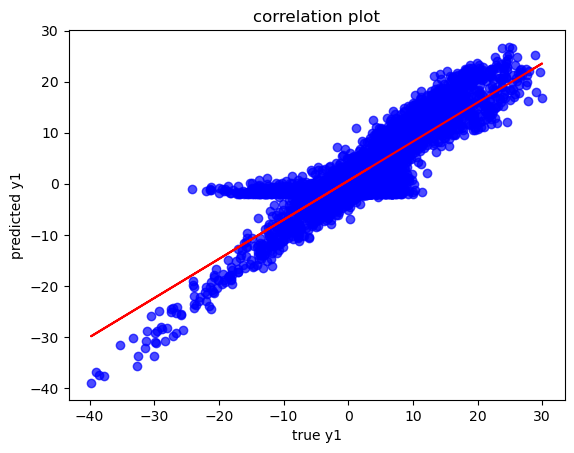

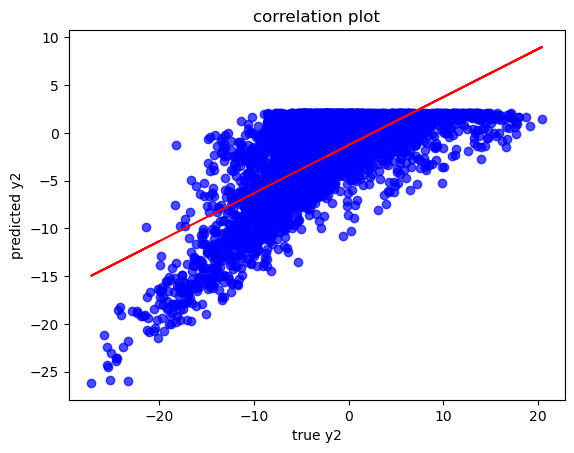

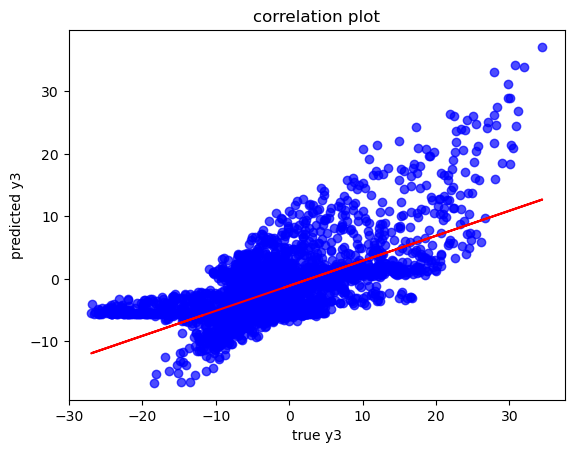

20.393810714693327 is the mean squared error for y1
3.4358589959963974 is the mean absolute error for y1
0.8746641527403644 is the correlation coefficient between true y1 and predicted y1
22.475429190080614 is the mean squared error for y2
3.57187183268471 is the mean absolute error for y2
0.7115506615936891 is the correlation coefficient between true y2 and predicted y2
39.785120604985465 is the mean squared error for y3
4.805491595413275 is the mean absolute error for y3
0.635409580111876 is the correlation coefficient between true y3 and predicted y3


In [325]:
#testing    
x = kernel_deg_10_a(test_x2)
size = len(x)
pred_y = np.zeros((size,3),dtype=float)

for i in range(size):
    t = np.dot(np.transpose(w),x[i])
    pred_y[i] = t

correlation_plot_q2(pred_y,test_y2)
print_metrics_q12(pred_y,test_y2)


Q3. Generalised Regression with non-polynomial kernel


We used gaussian and sigmoidal kernels for predicting probablity, for weight we have used the closed form solution

In [326]:
with open("regression_data_uni_group_13_train.txt", "r") as f:
    data = []
    for line in f: 
        d = line.strip().split()
        data.append(d)
#create training and testing data
#removing the first line feat1 feat2 ... 
data = data[1:]
data_size = len(data)
test_size = int(0.8 * data_size)
indices = np.random.permutation(data_size)
train_data = np.array([data[i] for i in indices[:test_size]],dtype=float)
test_data= np.array([data[i] for i in indices[test_size:]],dtype=float)
train_x3 = train_data[:,:5]
train_y3 = train_data[:,5]
test_x3 = test_data[:,:5]
test_y3 = test_data[:,5]

#calculating the weights
def weight_q3(ker):
    y = train_y3
    temp = np.dot(matrix.transpose(ker),ker)
    i = np.identity(len(temp))
    #t = linalg.inv(30*i+temp)
    t = linalg.inv(temp)
    
    w = np.dot(np.dot(t,matrix.transpose(ker)),y)
    
    return w

def non_poly_ker_exp(x):
    ker = np.ones((len(x),len(x[0])+1), dtype=float)
    for i in range(len(x)):
        ker[i,1:] = np.exp(x[i])
    
    return ker

import math
def gaussian_ker(x,u,s):
    ker = np.ones((len(x),len(x[0])+1), dtype=float)
    for i in range(len(x)):
        for j in range(len(x[0])):
            ker[i,j+1] = math.exp(-(x[i,j]-u[j])**2/(2*(s)**2))
    
    return ker

def non_polynomial_sigmoid(x,u,s):
    ker = np.ones((len(x),len(x[0])+1), dtype=float)
    for i in range(len(x)):
        for j in range(len(x[0])):
            ker[i,j+1] = 1/(1+math.exp(-(x[i,j]-u[j])/(s)))
    
    return ker

def correlation_plot_q3(pred_y,true_y):
    y = true_y
    t = pred_y
    mean_y = np.mean(true_y)
    mean_t=np.mean(pred_y)
    sum = 0
    for i in range(len(y)):
        sum+= (y[i]-mean_y)*(t[i]-mean_t)
    covariance = sum/len(y)
    s_true = np.std(y)
    
    m = covariance/(s_true**2)
    b = np.mean(t)-m*np.mean(y)
    
    regression_line_y = np.multiply(m, y) + b
    
    # Plot the scatter points and regression line
    plt.plot(y, t,'bo',alpha=0.7)
    plt.plot(y, regression_line_y, color='red')

    # Add labels and title
    plt.xlabel(f'true y')
    plt.ylabel(f'predicted y')
    plt.title('correlation plot')

    # Show the plot
    plt.show()

#calculating mean squared error,  mse(true_y,predicted_y)
def mse3(y,t):
    n = len(y)
    loss = 0
    
    for i in range(n):
        loss+= (y[i]-t[i])**2
    mean_loss= loss/n
    return mean_loss

#calculating mean absolute error, mae(true_y,predicted_y)
def mae3(y,t):
    n = len(y)
    loss = 0
    for i in range(n):
        loss+= abs(y[i]-[t[i]])
    mean_loss= loss/n
    type(mean_loss)
    return mean_loss[0]

# Calculate pearson correlation coefficient pcc(true_y,predicted_y)
def pcc3(y,t):
    
    covariance = np.cov(y, t)[0, 1]
    std_dev_y = np.std(y)
    std_dev_t = np.std(t)

    r = covariance/(std_dev_y*std_dev_t)
    return r


def print_metrics_q3(pred_y,true_y):
    t=pred_y
    y=true_y
    print(f"{mse3(y,t)} is the mean squared error for y")
    print(f"{mae3(y,t)} is the mean absolute error for y")
    print(f"{pcc3(y,t)} is the correlation coefficient between true yand predicted y")
    

In [327]:
u1 = np.mean(train_x3[:,0])
u2 = np.mean(train_x3[:,1])
u3 = np.mean(train_x3[:,2])
u4 = np.mean(train_x3[:,3])
u5 = np.mean(train_x3[:,4])
u=[u1,u2,u3,u4,u5]
u=[0,0,0,0,0]
s = 1
ker = non_polynomial_sigmoid(train_x3,u,s)
w = weight_q3(ker)
w.shape

(6,)

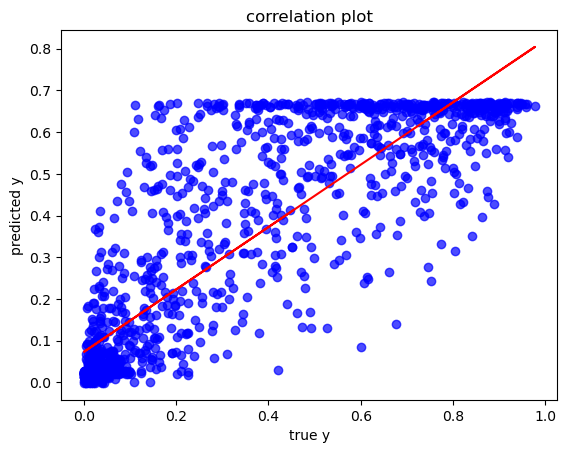

0.02426365757624096 is the mean squared error for y
0.10626370116639569 is the mean absolute error for y
0.8653377349273483 is the correlation coefficient between true yand predicted y


In [328]:
#testing    
size = len(test_x3)


x = non_polynomial_sigmoid(test_x3,u,s)

pred_y = np.zeros((size),dtype=float)

for i in range(size):
    t = np.dot(np.transpose(w),x[i])
    pred_y[i] = t

correlation_plot_q3(pred_y,test_y3)
#print(pred_y,test_y3)
print_metrics_q3(pred_y,test_y3)